### **Installing Libraries**

In [103]:
!pip install --upgrade matplotlib > None # need refresh enviroment after installation

In [104]:
!pip install basemap > None

In [105]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.cbook import boxplot_stats
from mpl_toolkits.basemap import Basemap
import plotly.express as px

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

%matplotlib inline

### Информация об атрибуте:

1) id: уникальный идентификатор

2) пол: "Мужчина", "Женщина" или "Другой"

3) возраст: возраст пациента

4) артериальная гипертензия: 0, если у пациента нет артериальной гипертензии, 1, если у пациента есть артериальная гипертензия

5) heart_disease: 0, если у пациента нет никаких сердечных заболеваний, 1, если у пациента есть сердечные заболевания

6) никогда не состоял в браке: "Нет" или "Да"

7) тип работы: "дети", "Правительство_жов", "Никогда не работал", "Частный" или "Самозанятый"

8) Тип местожительства: "Сельский" или "Городской"

9) avg_glucose_level: средний уровень глюкозы в крови

10) имт: индекс массы тела

11) статус курящего: "ранее курил", "никогда не курил", "курит" или "Неизвестно"*

12) инсульт: 1, если у пациента был инсульт, или 0, если нет

*Примечание: "Неизвестно" в smoking_status означает, что информация недоступна для этого пациента

## **Data Intro**

In [106]:
path = 'healthcare-dataset-stroke-data.csv'
data = pd.read_csv(path)
#импортируем набор с данными

data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [107]:
#узнаем размерность датасета
print('Число строк и колонок в датасете :',data.shape)

Число строк и колонок в датасете : (5110, 12)


In [108]:
print(f'Категориальные переменные в данных: {data.columns[data.dtypes==object].tolist()}')
print(f'Числовые переменные в данных: {data.columns[data.dtypes!=object].tolist()}')

Категориальные переменные в данных: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
Числовые переменные в данных: ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


In [109]:
print('Обозначение типов данных для каждого признака:')
data.dtypes

Обозначение типов данных для каждого признака:


id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Проверяем у каких признаков имеются нулевые значения

*Существует единственный признак bmi, в котором имеются нулевые значения*, а именно 201 нулевое значение



In [110]:
#проверяем, какие данные являются нулевыми
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<Axes: >

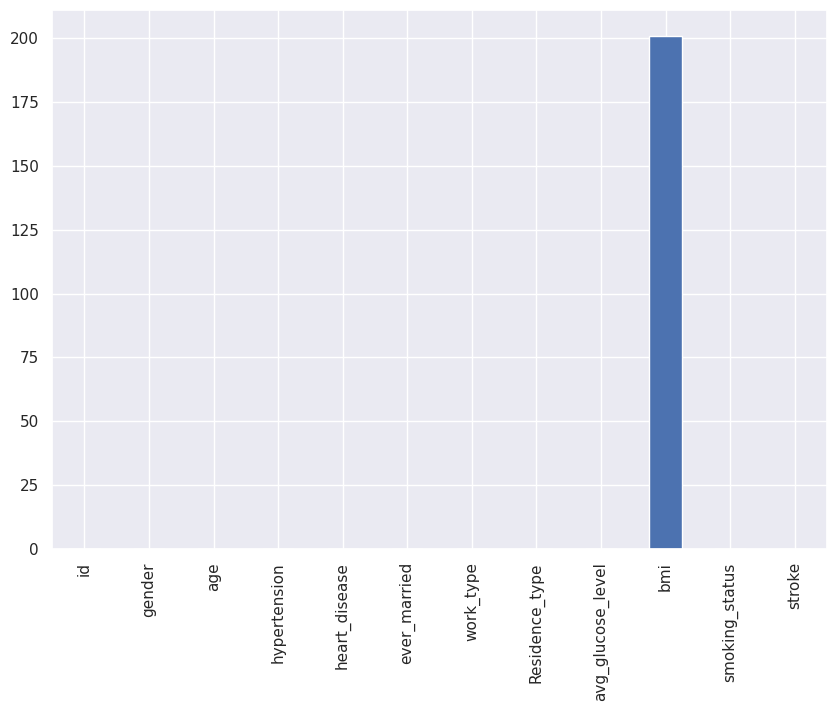

In [111]:
stat_isna = data.isna().sum()

plt.figure(figsize=(10,7))
plt.rc('font', size=10)
plt.xticks(np.arange(len(data.columns)), data.columns)
stat_isna.plot.bar()

In [112]:
data.shape

(5110, 12)

In [113]:
#удаляем все данные с нулевыми значениями
data = data.copy().dropna()

*Проверяем результат выполнения действий*

In [114]:
data.shape

(4909, 12)

In [115]:
#результаты удаления
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [116]:
print('Обозначение типов данных для каждого признака:')
data.dtypes

Обозначение типов данных для каждого признака:


id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [117]:
#Удалим признак "Id" для дальнейшей визуализации
data_vis = data.iloc [:, 1:]
data_vis.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


##EDA

Определим, что target переменной будет являтся признак *Stroke*

In [118]:
df_class = data['stroke']

Теперь рассмотрим как каждый признак коррелирует между собой

In [119]:
data_vis.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.274425,0.257123,0.235838,0.333398,0.232331
hypertension,0.274425,1.000000,0.115991,0.180543,0.167811,0.142515
heart_disease,0.257123,0.115991,1.000000,0.154525,0.041357,0.137938
avg_glucose_level,0.235838,0.180543,0.154525,1.000000,0.175502,0.138936
bmi,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.232331,0.142515,0.137938,0.138936,0.042374,1.000000


Вычислим корреляционную матрицу. Для этого нарисуем тепловую карту с маской и правильным соотношением сторон для Numerical columns

<Axes: >

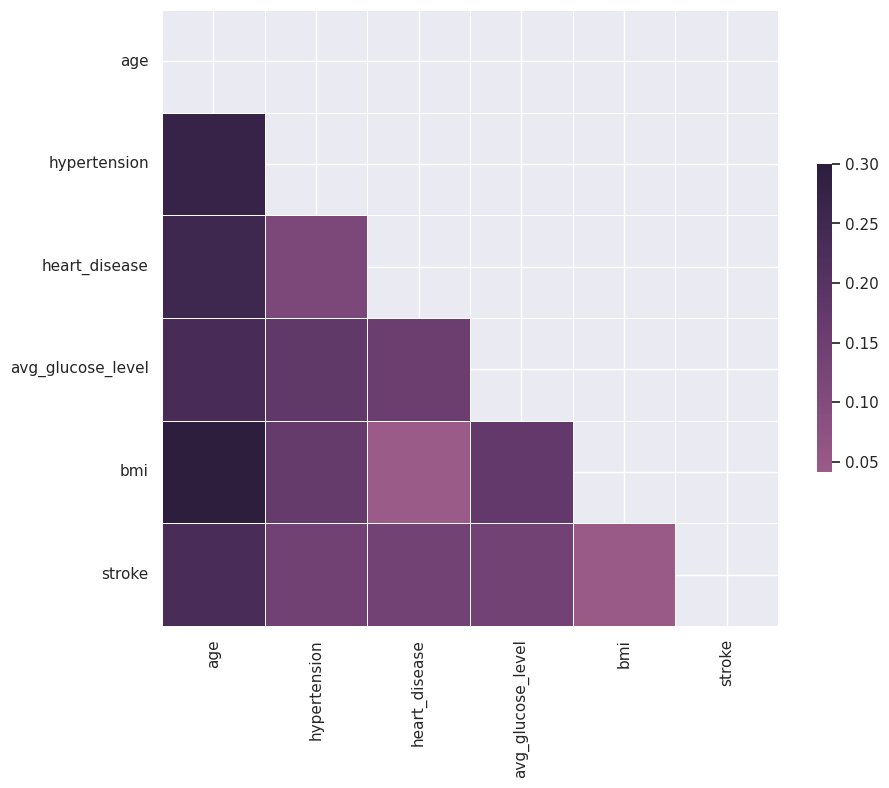

In [120]:
corr = data_vis.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corr, mask=mask, cmap=sns.cubehelix_palette(as_cmap=True), vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

У stroke (вероятность инсульта) самая сильная корреляция с возрастом age. Также видим что есть корреляция между age с bmi и  hypertension

### Numerical columns

Рассмотрим базовые характеристики для количественных данных датасета

In [121]:
num_cols = data.select_dtypes(exclude='object')
num_cols.shape

(4909, 7)

In [122]:
num_cols.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,20995.098457,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Categorical columns

Рассмотрим базовые характеристики для качественных данных датасета

In [123]:
cat_cols = data.select_dtypes(include='object')
cat_cols.head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
5,Male,Yes,Private,Urban,formerly smoked


In [124]:
cat_cols.shape

(4909, 5)

In [125]:
cat_cols.describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,4909,4909,4909,4909,4909
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2897,3204,2811,2490,1852


### Count Plot

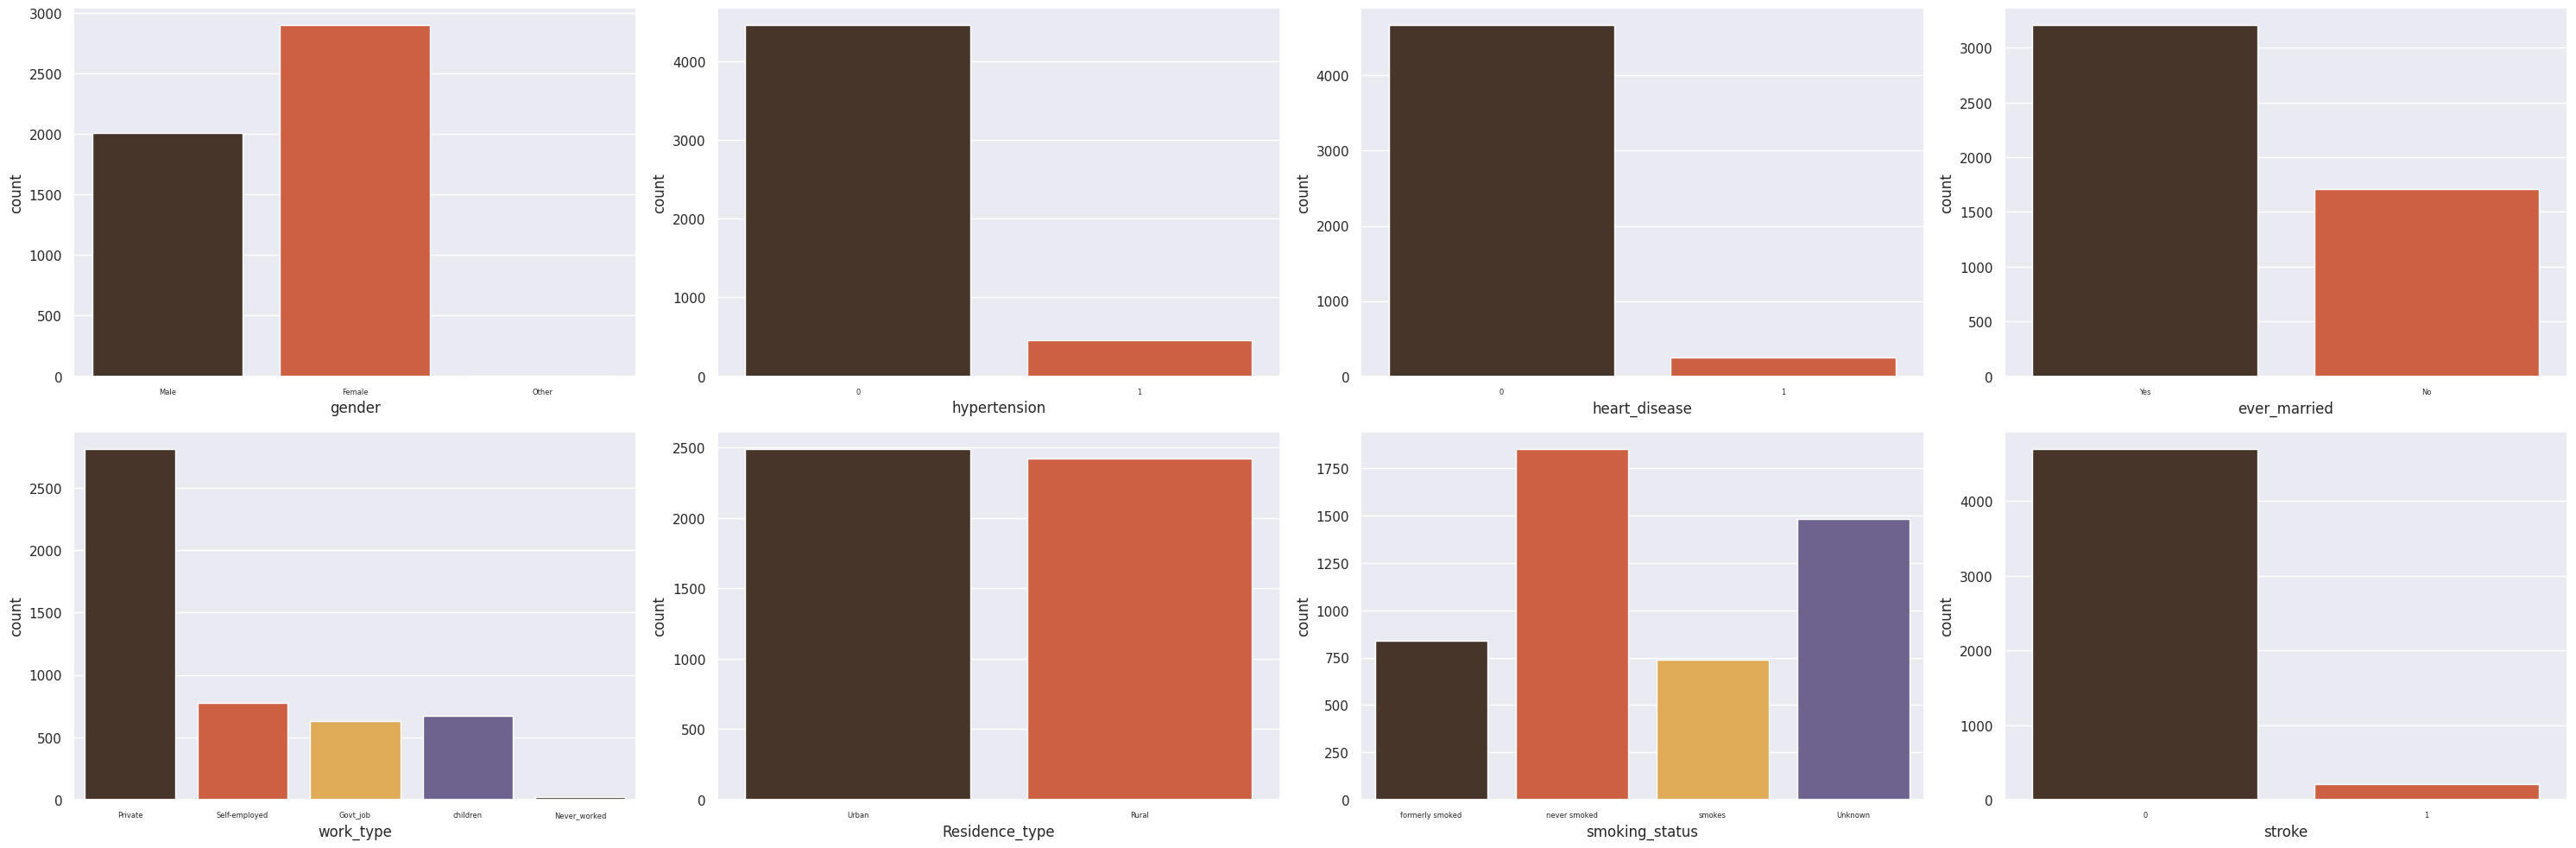

In [126]:
data_v = data.iloc [:, [1,3,4,5,6,7,10,11]]

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30, 10))
sns.set_theme(style="darkgrid")
custom_palette = ['#4D3425', '#E4512B', '#F5B041', '#6B5B95']

for idx, feature in enumerate(data_v.columns):
    row, col = divmod(idx, 4)
    sns.countplot(x=feature, data=data_v, ax=axes[row, col], palette=custom_palette)
    axes[row, col].tick_params(axis='x', labelsize=6)

fig.tight_layout()
plt.show()

Из графика мы можем сдeлать несколько выводых о наших данных:

1) Количество женщин больше, чем количество мужчин

2) Людей, страдающих гипертонией, меньше, чем людей, которые болеют этим

3) Соотношение людей, которые когда-либо состояли в браке 2:1

4) Большое количество людей работают в частном секторе

5) В наборе данных число людей, которые перенесли инсульт, значительно меньше. Так как наш датасет несбалансирован, нам придется использовать методы выборки для сбалансирования данных



In [127]:
data['gender'].value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

Также мы видим, что gender со значение "Other" всего один, возможно это какой-то выброс, так что его можно удалить их нашей выборки

In [128]:
data.shape

(4909, 12)

In [129]:
data = data[data["gender"] != "Other"]

In [130]:
data.shape

(4908, 12)

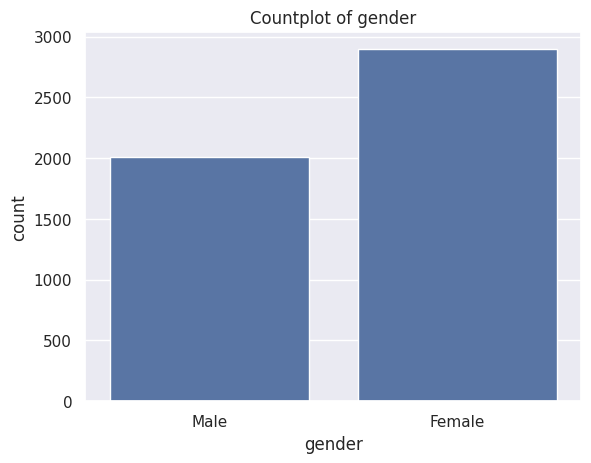

In [131]:
sns.countplot(x='gender', data=data)
plt.title('Countplot of gender')
plt.xlabel('gender')
plt.ylabel('count')
plt.show()


**Определение выбросов путем визуализации с использованием коробчатой диаграммы**

Можно заметить, что выбросы существуют у некоторых признаков, однако нет необходимости их удаления, так как они не являются значимыми

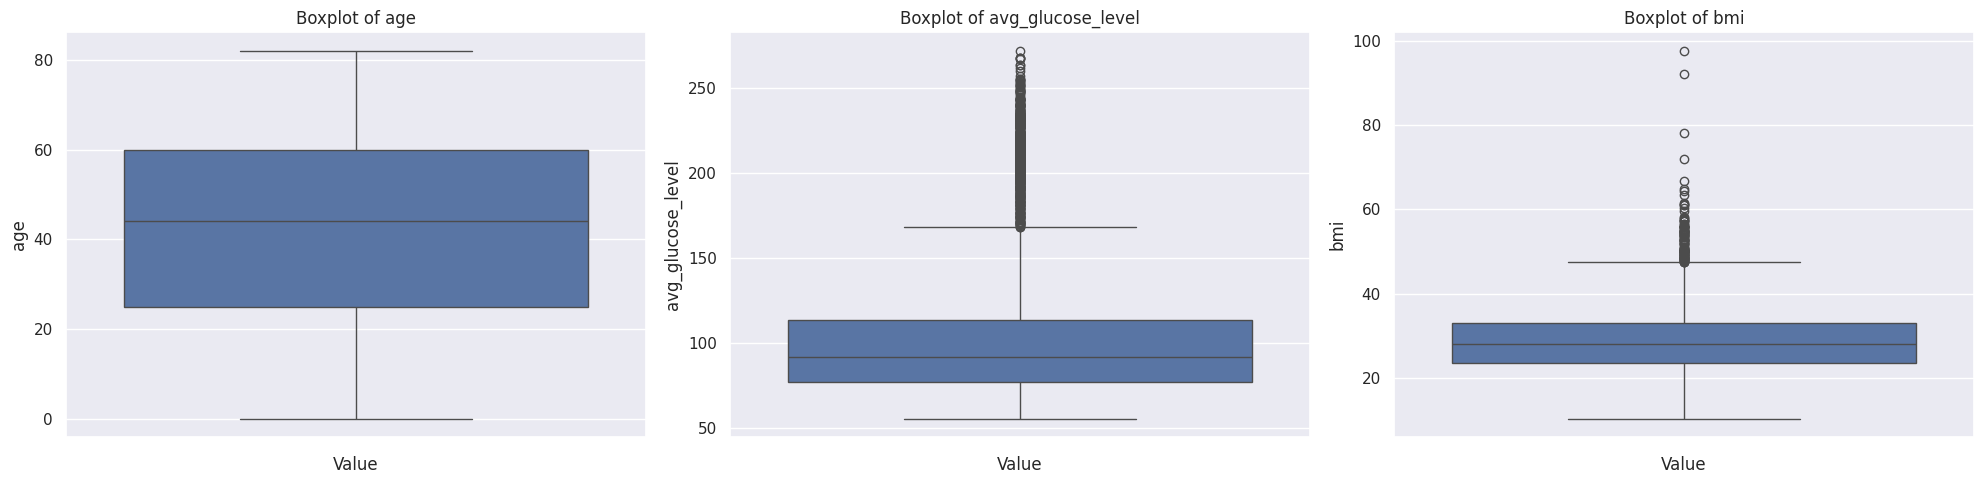

In [132]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

# Создаем boxplot для каждого столбца, используя отдельный subplot
for i, column in enumerate(data.loc[:, ['age', 'avg_glucose_level', 'bmi']].columns):
    sns.boxplot(y=data[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel(column)

# Отображаем график
plt.tight_layout()  # Автоматически корректирует подписи, чтобы они не перекрывались
plt.show()


## МЕТРИКА

В качестве главное метрики было выбрана метрика recall по следующим причинам, выявленным в ходе eda анализа:
- Данные очень не сбалансированны. В выборке классы не сбалансированны, людей у которых был инсульт, гораздо меньше, чем тех, у кого его не было.
- Нам важнее найти человека, у которого может быть инсульт, чем пропустить его, даже если мы повысим ложноположительную ошибку, когда здорового человека принимаем за больного.

## Data Preprocessing

In [133]:
X=data.drop(columns=['stroke', 'id'])
y=data['stroke']

In [134]:
print(X.shape)
print(y.shape)

(4908, 10)
(4908,)


Так как присутвуют категореальные переменные, необходимо учесть это и закодировать их с помощью one hot encoding. Для этого будут задействованы следу/щие столбцы: ['gender'], ['ever_married'], ['work_type'], ['Residence_type'], ['smoking_status']

In [135]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked
...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked


In [136]:
cat_feachers =list(cat_cols.columns)
num_features =list(X.select_dtypes(exclude='object').columns)

print(cat_feachers)
print(num_features)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']


In [137]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [138]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_features),
        ('cat', OneHotEncoder(), cat_feachers)
    ]
)

In [139]:
transformed_data = preprocessor.fit_transform(X)

In [140]:
new_categorical_features = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_feachers)
new_features = np.concatenate([num_features, new_categorical_features])
transformed_X = pd.DataFrame(transformed_data, columns=new_features)

In [141]:
transformed_X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0.0,1.0,228.69,36.6,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,80.0,0.0,1.0,105.92,32.5,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,49.0,0.0,0.0,171.23,34.4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,79.0,1.0,0.0,174.12,24.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,81.0,0.0,0.0,186.21,29.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


Делим наш датасет на тестовую и тренировочную выборки. Учтем тут дисбаланс классов, чтобы у нас и в обучающей и в тестовой выборке, более малый класс был представлен в равных пропорциях

In [142]:
x_train, x_test,  y_train, y_test = train_test_split(transformed_X, y, stratify=y, random_state=0)

In [143]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3681, 20)
(3681,)
(1227, 20)
(1227,)


##Modeling

In [144]:
from sklearn.metrics import classification_report, confusion_matrix

Как было видно выше, у нас есть сильный дисбаланс классов и надо будет учесть это при обучении модели. Пока что, попробуем вначале обучить просто логистическую регрессию без дополнительных парамметров

In [145]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1175
           1       0.00      0.00      0.00        52

    accuracy                           0.96      1227
   macro avg       0.48      0.50      0.49      1227
weighted avg       0.92      0.96      0.94      1227



In [146]:
cm = confusion_matrix(y_test, y_pred)

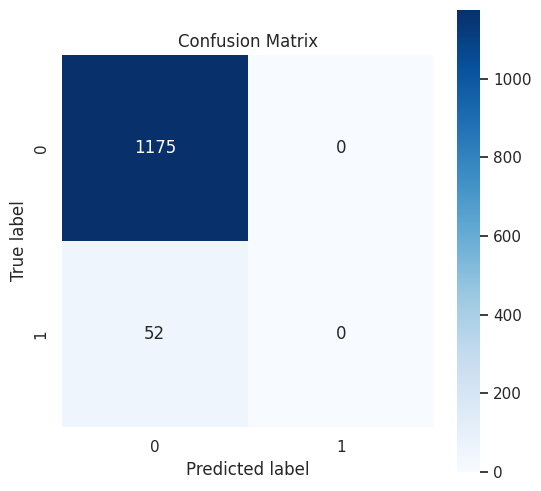

In [147]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", square=True)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Как видно, что из дисбаланса классов, наша модель просто определяла всех людей как здоровых и относила к одному классу, что нам не подходит. Recall у класса 1 (риск инсульта) равен нулю

Попробуем сбалансировать классы

In [148]:
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.72      0.83      1175
           1       0.11      0.75      0.19        52

    accuracy                           0.72      1227
   macro avg       0.55      0.74      0.51      1227
weighted avg       0.95      0.72      0.81      1227



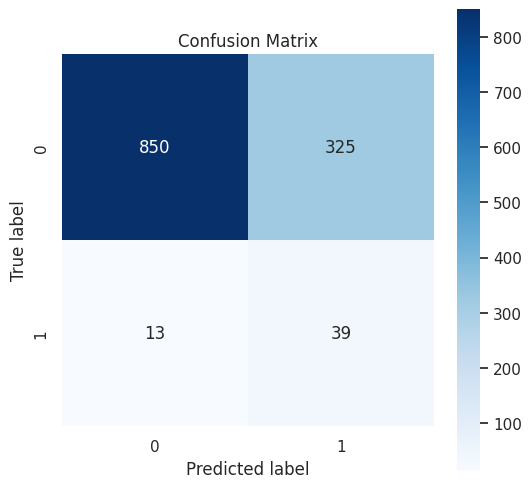

In [149]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", square=True)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Как мы видим, после сбалансирования классов, модель перестала всех людей относить к здоровым людям. У нас были обнаруженны почти многие больные люди (recall  = 0.75) для класса 1 хоть точность и снизилась